# **IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy

# **READ THE DATASET**

In [2]:
data=pd.read_csv('/content/spam.tsv',sep='\t')

# **EXPLORE THE DATSET**

**FIRST 5 DATA**

In [3]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


**REMOVE UNNECESSARY COLUMNS**

In [4]:
data.drop(columns = ['length' , 'punct'] , axis = 1 , inplace = True)

**COLUMN NAMES**

In [5]:
data.columns

Index(['label', 'message'], dtype='object')

**CHECKING NULL VALUE**

In [6]:
data.isnull().sum()

label      0
message    0
dtype: int64

**ROWS & COLUMNS**

In [7]:
data.shape

(5572, 2)

**COLUMN DATA TYPE**

In [8]:
data.dtypes

label      object
message    object
dtype: object

In [9]:
data['label_num'] = data['label'].map({
    'ham' : 0,
    'spam' : 1
})

Replacing ham with 0 & spam with 1

**LABEL - COLUMN**

<Axes: xlabel='label', ylabel='count'>

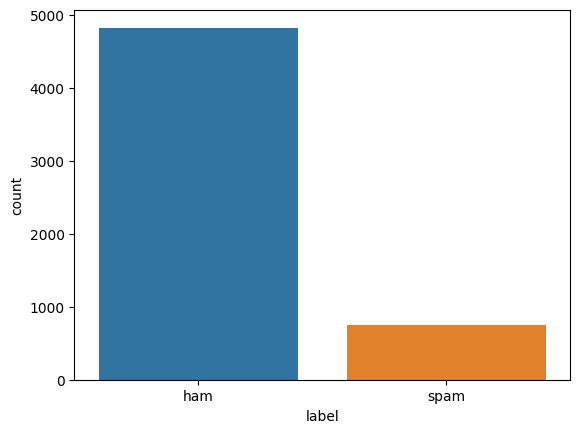

In [10]:
sns.countplot(data = data , x = 'label')

In [12]:
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# **LOWER TEXT**

In [13]:
data['p_message'] = data['message'].str.lower()

# **STEMMING & LEMMATIZATION**

In [15]:
nlp = spacy.load("en_core_web_sm")

In [16]:
def preprocess(text):

  doc = nlp(text)

  filtered_text = []

  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_text.append(token.lemma_)

  return " ".join(filtered_text)

In [17]:
data['p_message'] = data['p_message'].apply(preprocess)

In [18]:
data.head()

,label,message,label_num,p_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think go usf live


# **MODEL BUILDING**

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [21]:
x_train , x_test , y_train , y_test = train_test_split(data['p_message'] , data['label_num'] , test_size = 0.2)

**KNN**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = Pipeline( [
    ('vectorizer_tfidf' , TfidfVectorizer()),
    ('KNN' , KNeighborsClassifier())
])

In [24]:
knn.fit(x_train , y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [25]:
knn.score(x_test , y_test)

0.9031390134529148

In [39]:
y_pred = knn.predict(x_test)

In [40]:
y_test[30:40]

5426    0
849     0
3382    1
5540    1
985     0
35      0
3658    0
556     0
2600    0
1916    0
Name: label_num, dtype: int64

In [41]:
y_pred[30:40]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

**DECISION TREE CLASSIFIER**

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtc = Pipeline( [
    ('vectorizer_tfidf' , TfidfVectorizer()),
    ('DTC' , DecisionTreeClassifier())
])

In [44]:
dtc.fit(x_train , y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('DTC', DecisionTreeClassifier())])

In [45]:
dtc.score(x_test , y_test)

0.9668161434977578

In [54]:
y_predd = dtc.predict(x_test)

In [56]:
y_test[30:40]

5426    0
849     0
3382    1
5540    1
985     0
35      0
3658    0
556     0
2600    0
1916    0
Name: label_num, dtype: int64

In [57]:
y_predd[30:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**SUPPORT VECTOR CLASSIFIER**

In [58]:
from sklearn.svm import SVC

In [59]:
svc = Pipeline( [
    ('vectorizer_tfidf' , TfidfVectorizer()),
    ('SVC' , SVC())
])

In [60]:
svc.fit(x_train , y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()), ('SVC', SVC())])

In [61]:
svc.score(x_test , y_test)

0.9802690582959641

In [62]:
y_preddd = svc.predict(x_test)

In [63]:
y_test[40:50]

4216    0
4033    0
2185    0
5442    0
2934    0
3011    0
4158    0
1766    0
3858    0
3675    1
Name: label_num, dtype: int64

In [64]:
y_preddd[40:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

**RANDOM FOREST CLASSIFIER**

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = Pipeline( [
    ('vectorizer_tfidf' , TfidfVectorizer()),
    ('RFC' , RandomForestClassifier())
])

In [67]:
rfc.fit(x_train , y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('RFC', RandomForestClassifier())])

In [68]:
rfc.score(x_test , y_test)

0.979372197309417

In [69]:
y_predddd = rfc.predict(x_test)

In [70]:
y_test[50:60]

1757    0
3308    0
4360    0
4034    0
4271    0
3596    0
1782    0
923     0
4864    1
3980    0
Name: label_num, dtype: int64

In [71]:
y_predddd[50:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])